In [1]:
import pandas as pd
from datetime import datetime
import string
dis_df=pd.read_excel('data/disney.xlsx')
uni_df=pd.read_csv('data/universal_studio_branches.csv')

In [2]:
dis_df.isnull().sum()
dis_df[dis_df.duplicated()]
dis_df.drop_duplicates(inplace=True)
dis_df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-04-01 00:00:00,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-05-01 00:00:00,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-04-01 00:00:00,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-04-01 00:00:00,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-04-01 00:00:00,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [3]:
uni_df.isnull().sum()
uni_df.drop_duplicates(inplace=True)
uni_df.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [4]:
uni_df.value_counts('branch')

branch
Universal Studios Florida      30587
Universal Studios Singapore    15743
Universal Studios Japan         4529
Name: count, dtype: int64

In [5]:
dis_df['Year_Month']=pd.to_datetime(dis_df['Year_Month'],errors = 'coerce', format = '%Y-%m-%d')
dis_df
# dis_df['Year']=dis_df['Year_Month'].dt.year
# dis_df['Month']=dis_df['Year_Month'].dt.month
# dis_df.drop(columns='Year_Month')

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,NaT,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaT,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaT,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaT,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [6]:
uni_df['written_date']=pd.to_datetime(uni_df['written_date'])
uni_df

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,2021-05-30,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,2021-05-30,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,2021-05-30,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,2021-05-29,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,2021-05-28,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida
...,...,...,...,...,...,...
50899,vinz20,4.0,2010-03-29,I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore
50900,betty l,4.0,2010-03-29,Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore
50901,spoonos65,4.0,2010-03-28,Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore
50902,HeatSeekerWrexham_UK,4.0,2010-03-22,Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore


In [7]:
cols1=['Rating','Year_Month','Review_Text','Branch']
dis1=dis_df[cols1].rename(columns={'Year_Month':'Date'})
dis1
cols2=['rating','written_date','review_text','branch']
uni1=uni_df[cols2].rename(columns={'rating':'Rating','written_date':'Date','review_text':'Review_Text','branch':'Branch'})
uni1

,Rating,Date,Review_Text,Branch
0,2.0,2021-05-30,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,1.0,2021-05-30,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,2.0,2021-05-30,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,4.0,2021-05-29,When a person tries the test seat for the ride...,Universal Studios Florida
4,5.0,2021-05-28,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida
...,...,...,...,...
50899,4.0,2010-03-29,This is my first visit to a Universal Studio t...,Universal Studios Singapore
50900,4.0,2010-03-29,We finally visited Singapore's very first them...,Universal Studios Singapore
50901,4.0,2010-03-28,We visited during the first week of its 'soft ...,Universal Studios Singapore
50902,4.0,2010-03-22,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore


In [8]:
dis1['Rating'].describe()
uni1['Rating'].describe()

count    50859.000000
mean         4.257142
std          1.046513
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [9]:
review_df=pd.concat([dis1,uni1],axis=0)
review_df

,Rating,Date,Review_Text,Branch
0,4.0,2019-04-01,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,4.0,2019-05-01,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,4.0,2019-04-01,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,4.0,2019-04-01,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,4.0,2019-04-01,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...
50899,4.0,2010-03-29,This is my first visit to a Universal Studio t...,Universal Studios Singapore
50900,4.0,2010-03-29,We finally visited Singapore's very first them...,Universal Studios Singapore
50901,4.0,2010-03-28,We visited during the first week of its 'soft ...,Universal Studios Singapore
50902,4.0,2010-03-22,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore


In [10]:
# eda
review_df['Rating'].describe()

count    93503.000000
mean         4.239137
std          1.054447
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

cleaning review data

In [11]:
corpus=review_df[['Review_Text','Rating','Branch']]
corpus = corpus.dropna()
corpus['Review_Text']=corpus['Review_Text'].str.lower()

def remove_punctuation(text):
  table = str.maketrans('','',string.punctuation)
  return text.translate(table)

# Remove punctuation from the review heading and review body columns
corpus['Review_Text'] = corpus['Review_Text'].apply(remove_punctuation)
corpus

,Review_Text,Rating,Branch
0,if youve ever been to disneyland anywhere youl...,4.0,Disneyland_HongKong
1,its been a while since d last time we visit hk...,4.0,Disneyland_HongKong
2,thanks god it wasn t too hot or too humid wh...,4.0,Disneyland_HongKong
3,hk disneyland is a great compact park unfortun...,4.0,Disneyland_HongKong
4,the location is not in the city took around 1 ...,4.0,Disneyland_HongKong
...,...,...,...
50899,this is my first visit to a universal studio t...,4.0,Universal Studios Singapore
50900,we finally visited singapores very first theme...,4.0,Universal Studios Singapore
50901,we visited during the first week of its soft o...,4.0,Universal Studios Singapore
50902,we visited on the 3rd day of the soft opening ...,4.0,Universal Studios Singapore


In [12]:
from nltk.tokenize import word_tokenize
nltk_review = []
# row[1] gives you the values in each column for the current row, making it easy to access the data.
for row in corpus.iterrows():
    review_text = row[1][0]
    
    # Tokenize the review heading and review body using NLTK
    nltk_review.append(word_tokenize(review_text))

# Add the tokenized reviews as new columns to the DataFrame
corpus['nltk_review'] = nltk_review

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
stop_words = nltk.corpus.stopwords.words("english")
stop_words_add=['park','would']
stop_words=stop_words+stop_words_add
# Function to remove stop words from text
def remove_stopwords(text):
    text = [i for i in text if i not in stop_words]
    return text

# Apply remove_stopwords() function to 'nltk_tokens_heading' and 'nltk_tokens_body'
corpus['fliter_review1'] = corpus['nltk_review'].apply(remove_stopwords)

def lemmatizer1(text):
    lem=WordNetLemmatizer()
    lemmer_txt=[lem.lemmatize(token) for token in text]
    return lemmer_txt
    

corpus['fliter_review'] =corpus['fliter_review1'].apply(lemmatizer1)


In [14]:
corpus

,Review_Text,Rating,Branch,nltk_review,fliter_review1,fliter_review
0,if youve ever been to disneyland anywhere youl...,4.0,Disneyland_HongKong,"[if, youve, ever, been, to, disneyland, anywhe...","[youve, ever, disneyland, anywhere, youll, fin...","[youve, ever, disneyland, anywhere, youll, fin..."
1,its been a while since d last time we visit hk...,4.0,Disneyland_HongKong,"[its, been, a, while, since, d, last, time, we...","[since, last, time, visit, hk, disneyland, yet...","[since, last, time, visit, hk, disneyland, yet..."
2,thanks god it wasn t too hot or too humid wh...,4.0,Disneyland_HongKong,"[thanks, god, it, wasn, t, too, hot, or, too, ...","[thanks, god, hot, humid, visiting, otherwise,...","[thanks, god, hot, humid, visiting, otherwise,..."
3,hk disneyland is a great compact park unfortun...,4.0,Disneyland_HongKong,"[hk, disneyland, is, a, great, compact, park, ...","[hk, disneyland, great, compact, unfortunately...","[hk, disneyland, great, compact, unfortunately..."
4,the location is not in the city took around 1 ...,4.0,Disneyland_HongKong,"[the, location, is, not, in, the, city, took, ...","[location, city, took, around, 1, hour, kowlon...","[location, city, took, around, 1, hour, kowlon..."
...,...,...,...,...,...,...
50899,this is my first visit to a universal studio t...,4.0,Universal Studios Singapore,"[this, is, my, first, visit, to, a, universal,...","[first, visit, universal, studio, theme, went,...","[first, visit, universal, studio, theme, went,..."
50900,we finally visited singapores very first theme...,4.0,Universal Studios Singapore,"[we, finally, visited, singapores, very, first...","[finally, visited, singapores, first, theme, u...","[finally, visited, singapore, first, theme, un..."
50901,we visited during the first week of its soft o...,4.0,Universal Studios Singapore,"[we, visited, during, the, first, week, of, it...","[visited, first, week, soft, opening, unfortun...","[visited, first, week, soft, opening, unfortun..."
50902,we visited on the 3rd day of the soft opening ...,4.0,Universal Studios Singapore,"[we, visited, on, the, 3rd, day, of, the, soft...","[visited, 3rd, day, soft, opening, ticket, sal...","[visited, 3rd, day, soft, opening, ticket, sal..."


词频词云

In [33]:
import pickle
from os import path
import matplotlib.pyplot as plt
import matplotlib

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import numpy as np
from collections import Counter
from matplotlib import colors
def getciyun_most(map):  # get wordcloud
    # word+count
    x = []
    y = []
    for k, v in map.most_common(200):  # 300
        x.append(k)
        y.append(v)
    xi = x[0:200]
    xi = ' '.join(xi)  
    print(xi)

    # color
    # color_list = ['#FE968D', '#0F81AE', '#77E0C5', '#44C08A', '#E1E672', '#63C68A', '#FE9993', '#E1615A', '#1C7C64',
    #               '#84A9AC', '#206A5D', '#8DD9E7', '#B0C151']
    
    
    backgroud_Image = plt.imread("data/yun.jpg")
    color_list = ["#CD853F", "#CD6839", "#8B4726"]
    # # # disney的
    # backgroud_Image = plt.imread("data/米老鼠.jpeg")
    # color_list = ["#010101", "#e73a32", "#f5c459"]
    # # # universal
    # backgroud_Image = plt.imread("data/环球.jpg")
    # color_list = ['#c4a159','#172954','#b83437']
    colormap = colors.ListedColormap(color_list)
    wc = WordCloud(
        background_color='white',  # background color
        mask=backgroud_Image,  
        # font_path='whs.ttf',  
        max_words=2000,  # max words in cloud
        max_font_size=150,  
        random_state=30,  # color random
        colormap=colormap,
    )
    wc.generate_from_text(xi)

    # font color
    img_colors = ImageColorGenerator(backgroud_Image)
    # wc.recolor(color_func=img_colors)
    #show
    plt.imshow(wc)
    # no axis
    plt.axis('off')
    plt.show()

    print('生成词云成功!')

In [16]:

def getzhifang(map):  # Histogram
    x = []
    y = []
    for k, v in map.most_common(15):  # 15
        x.append(k)
        y.append(v)
    Xi = np.array(x)  
    Yi = np.array(y)
    width = 0.6
    
    plt.figure(figsize=(12, 6))  
    plt.bar(Xi, Yi, width, color='blue', label='important_word', alpha=0.8, )
    plt.xlabel("word")
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.show()
    return

In [17]:
def anylaseword(comment):
    commnetstr = '' 
    c = Counter()  # dictionary word:time
    index = 0
    for com in comment:
        index+=1
        for x in com: 
            if len(x) > 1 and x != '\r\n': 
                try:
                    c[x] += 1 
                except:
                    continue
    for (k, v) in c.most_common():  # fliter 
        if v < 5:
            c.pop(k)
            continue
 
    # print(len(c), c)
    getciyun_most(c)  # cloud
    getzhifang(c)  # Histogram
    print(commnetstr)

ride time day get disney one go great universal line disneyland place good kid pas food like show really wait fun queue visit went ticket much park lot year attraction also long see hour people back studio experience potter harry express well even worth minute dont first many fast take around family world got child best thing make still could parade going amazing staff two loved character every love adventure better need old way expensive theme area didnt little hotel early enjoyed must waiting want everything enjoy trip visited coaster new transformer small recommend big money pass price night sure crowd water think always never come buy say though bit adult nice walk definitely firework restaurant roller island took whole however made 10 mummy closed spent quite enough mountain busy crowded open able last use age everyone feel shop paris especially min train try magic drink different orlando know another next spend since main found getting le find something stay florida plan part awe

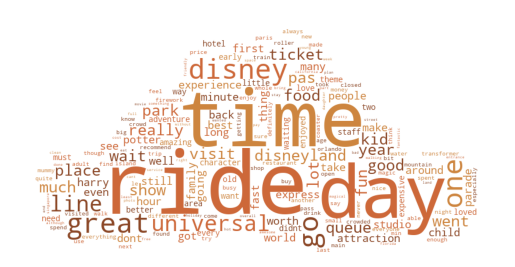

生成词云成功!


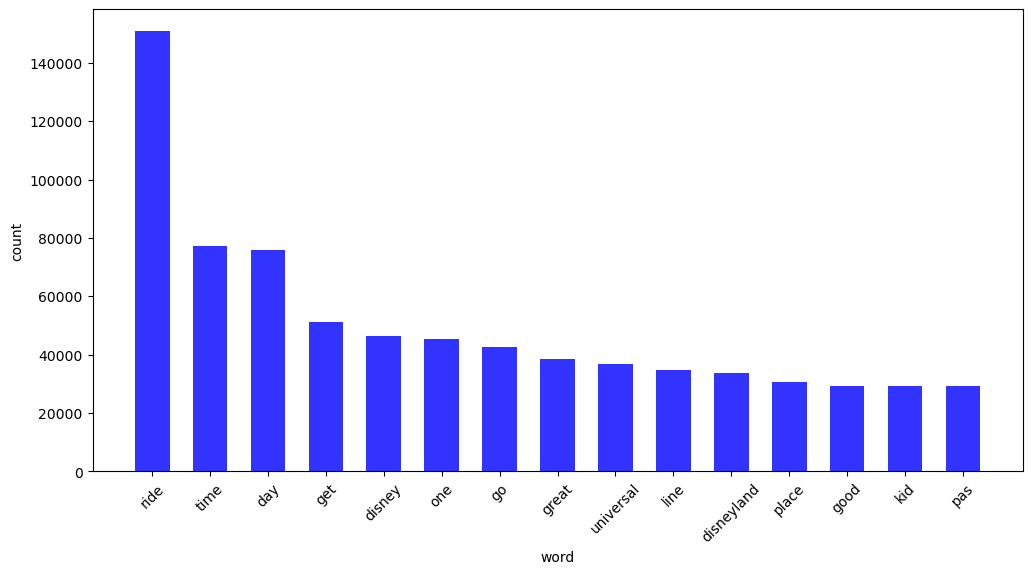

In [32]:
def anylase(comment):
    # comment=corpus['fliter_review']
    anylaseword(comment)

if __name__ == '__main__':
    anylase(corpus['fliter_review'])
    

In [19]:
corpus['Branch']=corpus['Branch'].str.replace('_',' ')
corpus['split']=corpus['Branch'].str.split(' ')
corpus

,Review_Text,Rating,Branch,nltk_review,fliter_review1,fliter_review,split
0,if youve ever been to disneyland anywhere youl...,4.0,Disneyland HongKong,"[if, youve, ever, been, to, disneyland, anywhe...","[youve, ever, disneyland, anywhere, youll, fin...","[youve, ever, disneyland, anywhere, youll, fin...","[Disneyland, HongKong]"
1,its been a while since d last time we visit hk...,4.0,Disneyland HongKong,"[its, been, a, while, since, d, last, time, we...","[since, last, time, visit, hk, disneyland, yet...","[since, last, time, visit, hk, disneyland, yet...","[Disneyland, HongKong]"
2,thanks god it wasn t too hot or too humid wh...,4.0,Disneyland HongKong,"[thanks, god, it, wasn, t, too, hot, or, too, ...","[thanks, god, hot, humid, visiting, otherwise,...","[thanks, god, hot, humid, visiting, otherwise,...","[Disneyland, HongKong]"
3,hk disneyland is a great compact park unfortun...,4.0,Disneyland HongKong,"[hk, disneyland, is, a, great, compact, park, ...","[hk, disneyland, great, compact, unfortunately...","[hk, disneyland, great, compact, unfortunately...","[Disneyland, HongKong]"
4,the location is not in the city took around 1 ...,4.0,Disneyland HongKong,"[the, location, is, not, in, the, city, took, ...","[location, city, took, around, 1, hour, kowlon...","[location, city, took, around, 1, hour, kowlon...","[Disneyland, HongKong]"
...,...,...,...,...,...,...,...
50899,this is my first visit to a universal studio t...,4.0,Universal Studios Singapore,"[this, is, my, first, visit, to, a, universal,...","[first, visit, universal, studio, theme, went,...","[first, visit, universal, studio, theme, went,...","[Universal, Studios, Singapore]"
50900,we finally visited singapores very first theme...,4.0,Universal Studios Singapore,"[we, finally, visited, singapores, very, first...","[finally, visited, singapores, first, theme, u...","[finally, visited, singapore, first, theme, un...","[Universal, Studios, Singapore]"
50901,we visited during the first week of its soft o...,4.0,Universal Studios Singapore,"[we, visited, during, the, first, week, of, it...","[visited, first, week, soft, opening, unfortun...","[visited, first, week, soft, opening, unfortun...","[Universal, Studios, Singapore]"
50902,we visited on the 3rd day of the soft opening ...,4.0,Universal Studios Singapore,"[we, visited, on, the, 3rd, day, of, the, soft...","[visited, 3rd, day, soft, opening, ticket, sal...","[visited, 3rd, day, soft, opening, ticket, sal...","[Universal, Studios, Singapore]"


In [20]:
corpus['country']=corpus['split'].apply(lambda x: x[-1])
corpus['type']=corpus['split'].apply(lambda x:' '.join(x[:-1]))

In [21]:
corpus
corpus.drop(columns='split')

,Review_Text,Rating,Branch,nltk_review,fliter_review1,fliter_review,country,type
0,if youve ever been to disneyland anywhere youl...,4.0,Disneyland HongKong,"[if, youve, ever, been, to, disneyland, anywhe...","[youve, ever, disneyland, anywhere, youll, fin...","[youve, ever, disneyland, anywhere, youll, fin...",HongKong,Disneyland
1,its been a while since d last time we visit hk...,4.0,Disneyland HongKong,"[its, been, a, while, since, d, last, time, we...","[since, last, time, visit, hk, disneyland, yet...","[since, last, time, visit, hk, disneyland, yet...",HongKong,Disneyland
2,thanks god it wasn t too hot or too humid wh...,4.0,Disneyland HongKong,"[thanks, god, it, wasn, t, too, hot, or, too, ...","[thanks, god, hot, humid, visiting, otherwise,...","[thanks, god, hot, humid, visiting, otherwise,...",HongKong,Disneyland
3,hk disneyland is a great compact park unfortun...,4.0,Disneyland HongKong,"[hk, disneyland, is, a, great, compact, park, ...","[hk, disneyland, great, compact, unfortunately...","[hk, disneyland, great, compact, unfortunately...",HongKong,Disneyland
4,the location is not in the city took around 1 ...,4.0,Disneyland HongKong,"[the, location, is, not, in, the, city, took, ...","[location, city, took, around, 1, hour, kowlon...","[location, city, took, around, 1, hour, kowlon...",HongKong,Disneyland
...,...,...,...,...,...,...,...,...
50899,this is my first visit to a universal studio t...,4.0,Universal Studios Singapore,"[this, is, my, first, visit, to, a, universal,...","[first, visit, universal, studio, theme, went,...","[first, visit, universal, studio, theme, went,...",Singapore,Universal Studios
50900,we finally visited singapores very first theme...,4.0,Universal Studios Singapore,"[we, finally, visited, singapores, very, first...","[finally, visited, singapores, first, theme, u...","[finally, visited, singapore, first, theme, un...",Singapore,Universal Studios
50901,we visited during the first week of its soft o...,4.0,Universal Studios Singapore,"[we, visited, during, the, first, week, of, it...","[visited, first, week, soft, opening, unfortun...","[visited, first, week, soft, opening, unfortun...",Singapore,Universal Studios
50902,we visited on the 3rd day of the soft opening ...,4.0,Universal Studios Singapore,"[we, visited, on, the, 3rd, day, of, the, soft...","[visited, 3rd, day, soft, opening, ticket, sal...","[visited, 3rd, day, soft, opening, ticket, sal...",Singapore,Universal Studios


Text(0.5, 1.0, 'the ratings of the two amusment parks')

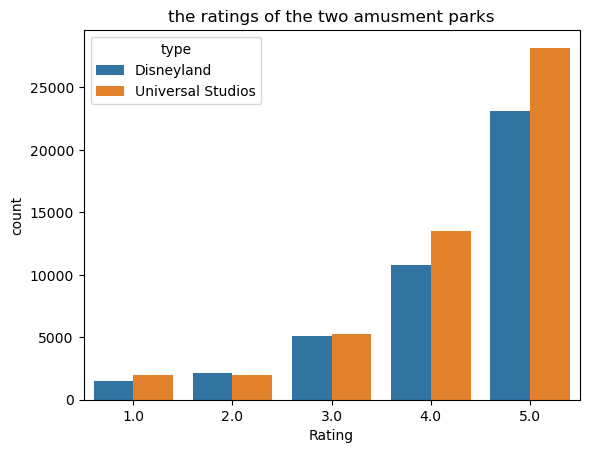

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=corpus['Rating'],hue=corpus['type'])
plt.title('the ratings of the two amusment parks')

Text(0.5, 1.0, 'the ratings of Universal Studio in each country')

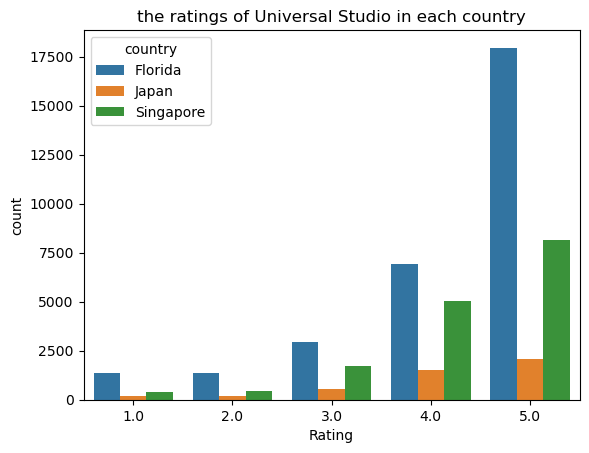

In [23]:
disney_land_review=corpus[corpus['type']=='Universal Studios']
sns.countplot(x=disney_land_review['Rating'],hue=disney_land_review['country'])
plt.title('the ratings of Universal Studio in each country')

Text(0.5, 1.0, 'the ratings of Disneyland in each country')

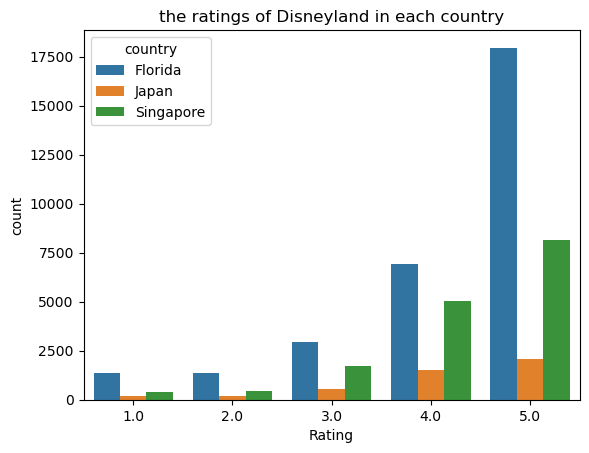

In [24]:
universal_review=corpus[corpus['type']=='Disneyland']
sns.countplot(x=disney_land_review['Rating'],hue=disney_land_review['country'])
plt.title('the ratings of Disneyland in each country')

ride time day disney disneyland get one go great kid place food line year good show queue really visit like see parade went much people lot wait also child long back fast hour park fun character pas even experience first attraction many around ticket take well dont world minute family hotel staff still firework make mountain thing got old could paris worth going little small trip two best every loved expensive love way didnt amazing need better everything magic big always early night crowd want visited closed california magical enjoyed never restaurant price say enjoy space sure think come waiting main adult mickey must recommend bit nice busy new land area took though adventure train last money 10 made enough use open crowded however daughter quite pass theme florida know found walk whole everyone find feel castle stay definitely clean age able spent holiday end hong kong different le member shop plan cant water especially street next drink friendly least star since another young phot

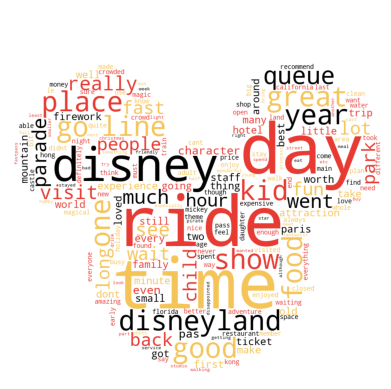

生成词云成功!


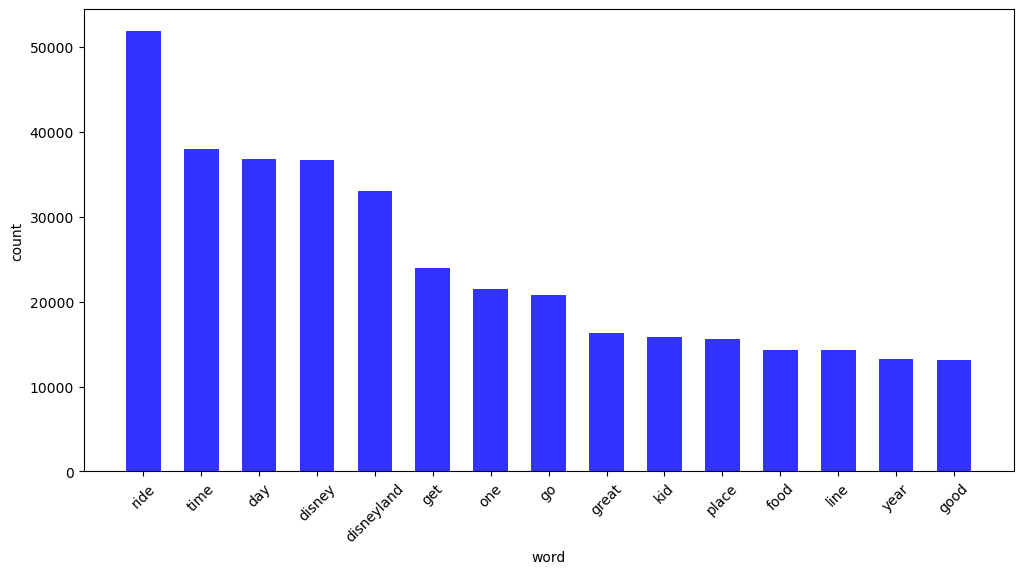

In [28]:
anylase(corpus[corpus['type']=='Disneyland']['fliter_review'])


ride time day universal get one great go line potter harry pas express studio wait fun good ticket like place really show attraction went park kid queue food much lot visit also long worth hour experience back well transformer minute see even year people disney dont family world best coaster take got many first theme around adventure area amazing thing mummy island make two fast still going loved could must roller enjoyed better waiting need every new way early love didnt water buy enjoy pass expensive staff want money recommend singapore child visited little everything old walk price definitely sure movie orlando though simpson big whole bit think nice come spent trip awesome crowd night never adult free however min locker say alley try hotel able made took shop 10 quite especially spend age jurassic 3d everyone drink part enough fan feel crowded different another character diagon always open since done restaurant shrek small cost pay next last getting use busy without 4d something ov

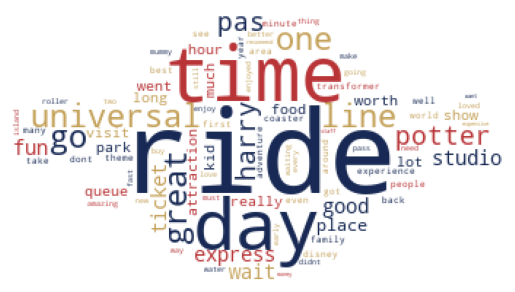

生成词云成功!


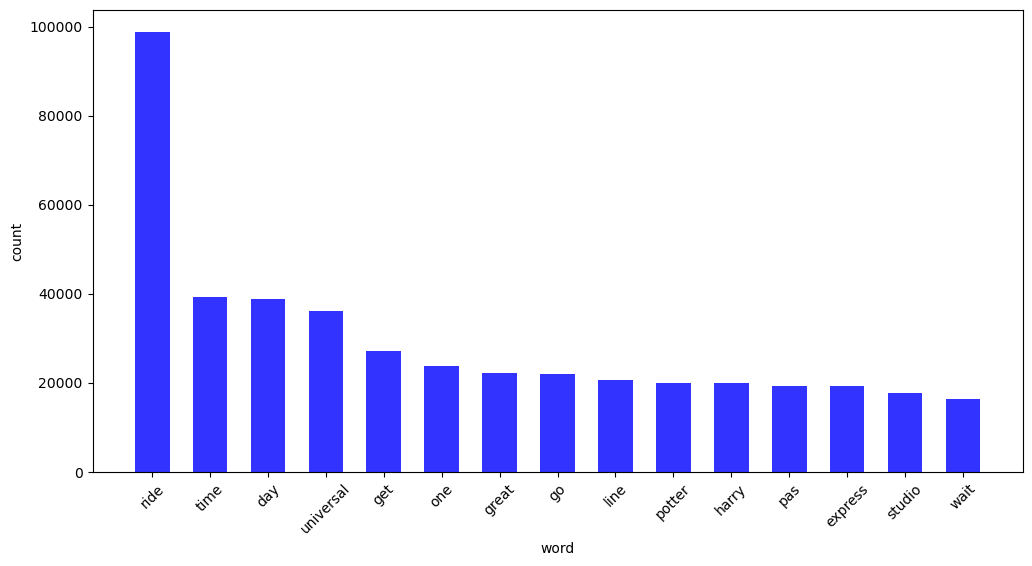

In [26]:
anylase(corpus[corpus['type']=='Universal Studios']['fliter_review'])